In [1]:
import numpy as np
import cv2
import requests
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

(1549, 1216)


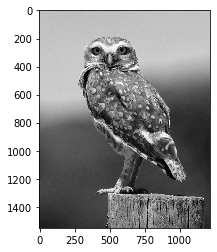

In [2]:
url = r'https://upload.wikimedia.org/wikipedia/commons/1/14/Athene_cuniculariaa.jpg'
resp = requests.get(url, stream=True).raw
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
print(image.shape)
plt.imshow(image, cmap='gray')

In [3]:
# Suppose we choose r = 20
# we choose oversampling to be 10
r = 200
oversample_cols = 5

m, n = image.shape
print(m,n)

# Compute P = random projection matrix 
P = np.random.rand(m, r + oversample_cols)

# Shrink colspace of image down to colspace of P
# Should yield a tall thin vector
Z = image.T@P
print("Z_shape", Z.shape)

# Compute QR factorization on Z to get orthonormal basis 
Q, R = np.linalg.qr(Z, mode='reduced')
print('Q_shape', Q.shape)
print('R_shape', R.shape)

# Let Y be the projection of X onto Q
Y = (image@Q).T
print('Y_shape', Y.shape)

U_y, S, Vt = np.linalg.svd(Y, full_matrices=False)
print('U-y_shape', U_y.shape)
print('S_shape', S.shape)
print('Vt_shape', Vt.shape)

U = Q@U_y 

print(U.shape, np.diag(S).shape, Vt.shape)



1549 1216
Z_shape (1216, 205)
Q_shape (1216, 205)
R_shape (205, 205)
Y_shape (205, 1549)
U-y_shape (205, 205)
S_shape (205,)
Vt_shape (205, 1549)
(1216, 205) (205, 205) (205, 1549)


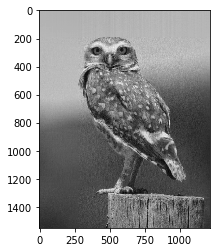

In [4]:
randSVD = (U@np.diag(S)@Vt).T
plt.imshow(randSVD, cmap='gray')

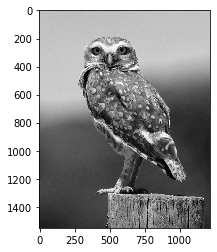

In [5]:
U_c, S_c, Vt_c = np.linalg.svd(image, full_matrices=False)

plt.imshow(U_c@np.diag(S_c)@Vt_c, cmap='gray')